In [6]:
from hmmlearn import hmm
import numpy as np

# Observations
observations = ['Walk', 'Shop', 'Clean']

# Define model
model = hmm.MultinomialHMM(n_components=2, n_trials=1, random_state=42)

# Set start probabilities
model.startprob_ = np.array([0.6, 0.4])

# Set transition matrix
model.transmat_ = np.array([
    [0.7, 0.3],
    
    [0.4, 0.6]
])

# Set emission probabilities
model.emissionprob_ = np.array([
    [0.1, 0.4, 0.5],  # State 0 (Rainy)
    [0.6, 0.3, 0.1],  # State 1 (Sunny)
])

# Define observation sequence (ONE-HOT encoded now)
obs_seq = np.array([
    [1, 0, 0],  # Walk
    [0, 1, 0],  # Shop
    [0, 0, 1]   # Clean
])

# Predict hidden states
logprob, hidden_states = model.decode(obs_seq, algorithm="viterbi")

# Output
print("Observation sequence:", ["Walk", "Shop", "Clean"])
print("Predicted hidden states:", hidden_states)


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Observation sequence: ['Walk', 'Shop', 'Clean']
Predicted hidden states: [1 0 0]


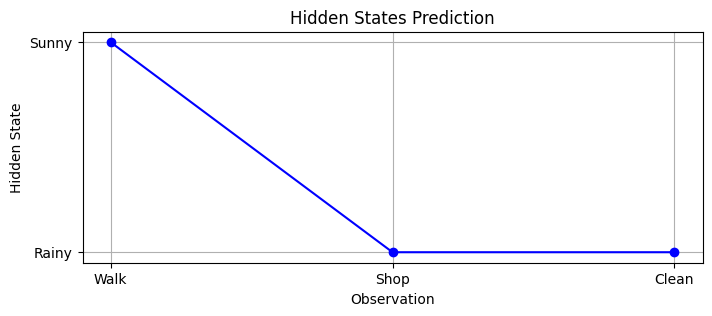

In [7]:
import matplotlib.pyplot as plt

# Observations
observations = ['Walk', 'Shop', 'Clean']

# (Assuming you already have hidden_states from model.decode)

# Plotting
plt.figure(figsize=(8, 3))
plt.plot(hidden_states, marker='o', linestyle='-', color='b')
plt.yticks([0, 1], ['Rainy', 'Sunny'])
plt.xticks(range(len(observations)), observations)
plt.xlabel('Observation')
plt.ylabel('Hidden State')
plt.title('Hidden States Prediction')
plt.grid(True)
plt.show()
